In [18]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [19]:
timed_df = pd.read_csv("close_prices.csv")
timed_df.fillna(0, inplace=True)

timed_df['Date'] = pd.to_datetime(timed_df['Date'])
timed_df.set_index('Date', inplace=True)

# Drop columns where every entry is 0.0
timed_df = timed_df.loc[:, (timed_df != 0).any(axis=0)]

# # # Use the column selection to drop columns where less than the threshold number of values are non-zero
threshold = 0.70 * len(timed_df)
timed_df = timed_df.loc[:, (timed_df != 0).sum() >= threshold]

In [20]:
timed_df

,ABB,AEGISLOG,AMARAJABAT,AMBALALSA,ANDHRAPET,ANSALAPI,ARUNAHTEL,BOMDYEING,ASIANHOTNR,ATUL,...,BENGALASM,SUNDARAM,TAMBOLI,KCPSUGIND,KECL,KTIL,ZENTEC,APLAPOLLO,TERASOFT,STEELXIND
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,53.989998,0.000000,0.000000,0.000000,0.000000,0.0,96.300003,14.839999,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2000-01-04,52.599998,0.000000,0.000000,0.000000,0.000000,0.0,96.300003,14.579999,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2000-01-05,52.200001,0.000000,0.000000,0.000000,0.000000,0.0,96.300003,13.799999,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2000-01-06,56.000000,0.000000,0.000000,0.000000,0.000000,0.0,96.300003,14.189999,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2000-01-07,54.000000,0.000000,0.000000,0.000000,0.000000,0.0,96.300003,13.299999,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-06,4132.799805,326.799988,644.150024,40.500000,77.339996,0.0,15.870000,145.449997,139.600006,7027.399902,...,5626.049805,3.44,170.050003,35.900002,126.050003,55.049999,728.250000,1617.050049,46.310001,8.80
2023-10-09,4095.149902,322.700012,634.549988,41.310001,74.269997,14.3,14.930000,141.300003,129.649994,6889.799805,...,5610.049805,3.36,168.300003,36.660000,127.150002,55.000000,709.450012,1572.150024,44.180000,7.98
2023-10-10,4189.149902,323.299988,635.250000,42.130001,74.580002,0.0,15.000000,149.949997,133.500000,6882.899902,...,5645.899902,3.34,178.000000,38.480000,130.899994,52.730000,744.900024,1615.250000,47.060001,8.49


In [21]:
# Assuming timed_df is your DataFrame indexed by date

# Set the desired start and end dates
start_date = '2010-01-05'
end_date = '2019-01-05'

# Use loc to select rows within the specified date range
timed_df = timed_df.loc[start_date:end_date]

# Set the desired number of columns to keep
num_columns_to_keep = 100 #Replace with your desired number

# first num columns
# timed_df = timed_df.iloc[:, :num_columns_to_keep]

# last num columns 
# timed_df = timed_df.iloc[:, -num_columns_to_keep:]

#random num columns
timed_df = timed_df.sample(n=num_columns_to_keep, axis=1)


timed_df.columns

Index(['MORARKFI', 'VISAKAIND', 'AKZOINDIA', 'TELESYS', 'GEOJITFSL',
       'SAHLIBHFI', 'GANECOS', 'INDCTST', 'KACHCHH', 'RELIABVEN', 'PRIVISCL',
       'DCMSHRIRAM', 'LIPPISYS', 'SIMRAN', 'GIPCL', 'WHIRLPOOL', 'NICCOPAR',
       'SUKHJITS', 'ASHISHPO', 'DELTAMAGNT', 'IVC', 'MEFCOMCAP', 'INANI',
       'TELECANOR', 'ZYDUSWELL', 'MINAXI', 'FRONTSP', 'ACE', 'LIMECHM',
       'TSPIRITUAL', 'BACPHAR', 'TEXINFRA', 'GUJHOTE', 'KECL', 'HINDZINC',
       'BOMOXY-B1', 'FORINTL', 'GULFPETRO', 'PGHL', 'WALCHPF', 'ASITCFIN',
       'SITAENT', 'JUMBO', 'LOYALTEX', 'BHARATGEAR', 'AGI', 'M&MFIN',
       'INANISEC', 'EMMESSA', 'ARIHANT', 'VIKRAMTH', 'GTL', 'EDUCOMP',
       'MEGASOFT', 'UNITINT', 'GEMSI', 'PANCARBON', 'SAMBANDAM', 'ADITYA',
       'GUJCONT', 'HRYNSHP', 'VADILALIND', 'NECLIFE', 'HDFCBANK', 'HOTLSILV',
       'TVSMOTOR', 'GFLLIMITED', 'VIJAYTX', 'SOFTSOL', 'INDOCO', 'APTECHT',
       'JINDCAP', 'UBL', 'SSWRL', 'SOTL', 'GODREJIND', 'MARUTI', 'MAKERSL',
       'MEGACOR', 'BBTC', 'DHANROT

In [22]:
timed_df

,MORARKFI,VISAKAIND,AKZOINDIA,TELESYS,GEOJITFSL,SAHLIBHFI,GANECOS,INDCTST,KACHCHH,RELIABVEN,...,JAYNECOIND,UNIVSTAR,HINDMILL,JAMSHRI,SUGALDAM,TGVSL,ORIBEVER,GOLECHA,DAAWAT,SHREEPAC
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,12.70,26.950001,655.299988,3.33,41.900002,11.020000,34.549999,39.950001,10.99,23.600000,...,31.600000,13.220000,44.500000,1760.0,16.85,13.840000,10.250000,10.73,6.895000,31.549999
2010-01-06,12.60,26.780001,650.099976,3.33,42.700001,11.000000,36.250000,41.900002,11.45,23.000000,...,31.350000,13.880000,44.500000,1845.0,17.50,13.640000,10.290000,10.31,6.835000,32.799999
2010-01-07,13.23,27.299999,652.450012,3.33,43.049999,11.540000,38.049999,43.950001,11.15,22.299999,...,30.299999,14.570000,44.500000,1930.0,17.50,13.630000,10.800000,10.82,6.865000,32.700001
2010-01-08,12.96,28.360001,652.450012,3.33,42.950001,11.150000,38.950001,44.000000,11.01,23.400000,...,31.000000,15.020000,44.500000,1910.0,16.90,13.900000,11.300000,11.31,6.895000,33.000000
2010-01-11,12.96,30.520000,653.049988,3.33,42.900002,11.420000,37.049999,46.200001,11.56,24.400000,...,37.099998,15.750000,44.500000,1960.0,16.15,14.440000,11.860000,10.96,6.995000,33.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,21.00,86.040001,1741.650024,3.33,46.299999,101.000000,294.700012,14.500000,2.29,12.830000,...,5.660000,46.400002,325.049988,3200.0,14.10,33.900002,84.949997,7.00,42.049999,12.250000
2019-01-01,21.00,87.379997,1773.099976,3.33,46.299999,100.000000,297.000000,14.250000,2.29,12.830000,...,5.930000,48.200001,325.049988,3200.0,13.50,34.549999,83.199997,7.00,41.650002,12.250000
2019-01-02,21.00,86.669998,1770.300049,3.33,45.299999,96.349998,290.000000,13.550000,2.40,12.830000,...,6.070000,49.150002,325.000000,3200.0,12.83,34.099998,85.000000,7.00,44.099998,12.250000


In [23]:
# Show daily returns
returns = timed_df.pct_change()
returns.fillna(0, inplace=True)
returns.replace([np.inf, -np.inf], 0, inplace=True)

returns

,MORARKFI,VISAKAIND,AKZOINDIA,TELESYS,GEOJITFSL,SAHLIBHFI,GANECOS,INDCTST,KACHCHH,RELIABVEN,...,JAYNECOIND,UNIVSTAR,HINDMILL,JAMSHRI,SUGALDAM,TGVSL,ORIBEVER,GOLECHA,DAAWAT,SHREEPAC
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-06,-0.007874,-0.006308,-0.007935,0.0,0.019093,-0.001815,0.049204,0.048811,0.041856,-0.025424,...,-0.007911,0.049924,0.000000,0.048295,0.038576,-0.014451,0.003902,-0.039143,-0.008702,0.039620
2010-01-07,0.050000,0.019417,0.003615,0.0,0.008197,0.049091,0.049655,0.048926,-0.026201,-0.030435,...,-0.033493,0.049712,0.000000,0.046070,0.000000,-0.000733,0.049563,0.049466,0.004389,-0.003049
2010-01-08,-0.020408,0.038828,0.000000,0.0,-0.002323,-0.033796,0.023653,0.001138,-0.012556,0.049327,...,0.023102,0.030885,0.000000,-0.010363,-0.034286,0.019809,0.046296,0.045287,0.004370,0.009174
2010-01-11,0.000000,0.076164,0.000920,0.0,-0.001164,0.024215,-0.048781,0.050000,0.049955,0.042735,...,0.196774,0.048602,0.000000,0.026178,-0.044379,0.038849,0.049557,-0.030946,0.014503,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,0.000000,0.006198,0.040443,0.0,0.016465,0.083110,0.002551,0.000000,0.000000,0.000000,...,-0.015652,0.000000,0.000000,0.035599,0.000000,0.036697,0.111184,0.000000,0.002384,0.000000
2019-01-01,0.000000,0.015574,0.018058,0.0,0.000000,-0.009901,0.007805,-0.017241,0.000000,0.000000,...,0.047703,0.038793,0.000000,0.000000,-0.042553,0.019174,-0.020600,0.000000,-0.009512,0.000000
2019-01-02,0.000000,-0.008125,-0.001579,0.0,-0.021598,-0.036500,-0.023569,-0.049123,0.048035,0.000000,...,0.023609,0.019710,-0.000154,0.000000,-0.049630,-0.013025,0.021635,0.000000,0.058823,0.000000


In [24]:
# Annualized covariance matrix

# cov_matrix_annual = returns.cov()*252
cov_matrix_annual = returns.cov()*246
cov_matrix_annual.fillna(0, inplace=True)
cov_matrix_annual

,MORARKFI,VISAKAIND,AKZOINDIA,TELESYS,GEOJITFSL,SAHLIBHFI,GANECOS,INDCTST,KACHCHH,RELIABVEN,...,JAYNECOIND,UNIVSTAR,HINDMILL,JAMSHRI,SUGALDAM,TGVSL,ORIBEVER,GOLECHA,DAAWAT,SHREEPAC
MORARKFI,0.344377,0.003948,-0.000273,0.221717,0.006038,0.222610,-0.006418,0.219709,0.224700,0.230063,...,-0.001669,0.226767,0.226892,0.226857,0.221129,0.222911,0.230562,0.223544,0.118437,0.224089
VISAKAIND,0.003948,0.182912,0.018756,0.000235,0.043706,0.028146,0.048337,0.014042,0.003737,0.014011,...,0.062434,0.006996,0.025105,0.016496,0.006524,0.064180,0.025825,0.003361,0.040772,0.003867
AKZOINDIA,-0.000273,0.018756,0.056546,-0.000619,0.013270,0.011380,0.011893,0.003609,0.001295,0.001561,...,0.019640,0.005014,0.005472,0.008484,0.001868,0.016711,0.011841,-0.000918,0.017954,-0.002301
TELESYS,0.221717,0.000235,-0.000619,0.221622,0.001048,0.222007,-0.001447,0.221654,0.221535,0.221675,...,-0.001075,0.221865,0.221943,0.221847,0.221679,0.221826,0.221972,0.221642,0.111482,0.221583
GEOJITFSL,0.006038,0.043706,0.013270,0.001048,0.149369,0.019631,0.027162,0.009209,0.003954,0.009381,...,0.050847,0.012302,0.013126,0.014586,-0.000110,0.050131,0.013375,0.002432,0.039876,0.006028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGVSL,0.222911,0.064180,0.016711,0.221826,0.050131,0.248186,0.042743,0.230077,0.227386,0.238789,...,0.062265,0.237783,0.244677,0.237567,0.217894,0.481475,0.257423,0.217729,0.163194,0.221208
ORIBEVER,0.230562,0.025825,0.011841,0.221972,0.013375,0.237096,0.026211,0.219750,0.228473,0.212817,...,0.010939,0.228399,0.234299,0.227848,0.222021,0.257423,0.569323,0.221540,0.125288,0.221316
GOLECHA,0.223544,0.003361,-0.000918,0.221642,0.002432,0.217997,-0.002215,0.224989,0.216118,0.231498,...,0.007189,0.224662,0.219488,0.223015,0.226436,0.217729,0.221540,0.360770,0.113608,0.224345
DAAWAT,0.118437,0.040772,0.017954,0.111482,0.039876,0.133444,0.034584,0.121594,0.112667,0.128354,...,0.059313,0.120773,0.138888,0.122759,0.116903,0.163194,0.125288,0.113608,0.351502,0.107190


In [25]:
weights = np.full(timed_df.shape[1], 1 / timed_df.shape[1])
weights

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01])

In [26]:
# Calculate PORTFOLIO variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.10439487407299222

In [27]:
# Calculate PORTFOLIO volatility (std. dev)
port_volatility = np.sqrt(port_variance)
port_volatility

0.32310195615779275

In [28]:
# Annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

-0.7679468302020606

In [29]:
# DISPLAY

percent_var = str(round(port_variance, 2)*100) + "%"
percent_vol = str(round(port_volatility, 2)*100) + "%"
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100) + "%"

print ("Expected Annual Return: " + percent_ret)
print ("Annual Volatility: " + percent_vol)
print ("Annual Variance: " + percent_var)

Expected Annual Return: -77.0%
Annual Volatility: 32.0%
Annual Variance: 10.0%


# OPTIMIZATION

In [30]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [31]:
mu = expected_returns.mean_historical_return(timed_df, frequency=252)

# mu = expected_returns.ema_historical_return(timed_df)

# mu = expected_returns.return_model(timed_df)


# mu = expected_returns.capm_return(timed_df)


mu.fillna(0, inplace = True)
mu.replace(np.inf, 0.0, inplace=True)

In [32]:
# S = risk_models.sample_cov(timed_df)

S = risk_models.exp_cov(timed_df)

# S = risk_models.CovarianceShrinkage(timed_df)

# S = (S + S.T) / 2

S.fillna(0, inplace = True)
S.replace(np.inf, 0.0, inplace=True)

In [33]:
# S_normalized
# S_f = (S + S.T) / 2

#S_reg
S_f = S + 1e-6 * np.eye(S.shape[0])


In [34]:
# ef = EfficientFrontier(mu, S)
ef = EfficientFrontier(mu, S_f, solver="ECOS")
# solvers: ECOS, OSQP

# weights = ef.max_sharpe()


# Maximize Return for a Target Volatility:
# weights = ef.efficient_return(target_return=0.10)

# Minimize Volatility for a Target Return:
weights = ef.efficient_risk(target_volatility=0.30)

refined_weights = ef.clean_weights()


In [35]:
print(refined_weights)
print(weights)
print(ef)

OrderedDict([('MORARKFI', 0.0), ('VISAKAIND', 0.0), ('AKZOINDIA', 0.0), ('TELESYS', 0.0), ('GEOJITFSL', 0.0), ('SAHLIBHFI', 0.0), ('GANECOS', 0.0), ('INDCTST', 0.0), ('KACHCHH', 0.0), ('RELIABVEN', 0.0), ('PRIVISCL', 0.0), ('DCMSHRIRAM', 0.0), ('LIPPISYS', 0.0), ('SIMRAN', 0.0), ('GIPCL', 0.0), ('WHIRLPOOL', 0.08445), ('NICCOPAR', 0.0), ('SUKHJITS', 0.0), ('ASHISHPO', 0.0), ('DELTAMAGNT', 0.0), ('IVC', 0.0), ('MEFCOMCAP', 0.0), ('INANI', 0.0), ('TELECANOR', 0.0), ('ZYDUSWELL', 0.0), ('MINAXI', 0.0), ('FRONTSP', 0.0), ('ACE', 0.0), ('LIMECHM', 0.0), ('TSPIRITUAL', 0.0), ('BACPHAR', 0.0), ('TEXINFRA', 0.0), ('GUJHOTE', 0.0), ('KECL', 0.0), ('HINDZINC', 0.0), ('BOMOXY-B1', 0.0), ('FORINTL', 0.0), ('GULFPETRO', 0.0), ('PGHL', 0.0), ('WALCHPF', 0.0), ('ASITCFIN', 0.0), ('SITAENT', 0.0), ('JUMBO', 0.0), ('LOYALTEX', 0.0), ('BHARATGEAR', 0.0), ('AGI', 0.0), ('M&MFIN', 0.0), ('INANISEC', 0.0), ('EMMESSA', 0.0), ('ARIHANT', 0.0), ('VIKRAMTH', 0.0), ('GTL', 0.0), ('EDUCOMP', 0.0), ('MEGASOFT', 0

In [36]:
print ()
print ()
print ("-----PORTFOLIO PERFORMANCE-----")
print ()


ef.portfolio_performance(verbose = True)


print ()
print ()
print ("-----ASSET ALLOCATION-----")
print ()


refined_weights = {key: value for key, value in refined_weights.items() if value != 0.0}

# Normalize the percentages
total_weight = sum(refined_weights.values())
refined_weights_percent = {key: (value / total_weight) * 100 for key, value in refined_weights.items()}
assest = []
weight = {}
for key, value in refined_weights_percent.items():
    assest.append(key)
    weight[key] = value
    print(f"{key}: {value:.2f}%")




-----PORTFOLIO PERFORMANCE-----

Expected annual return: 37.7%
Annual volatility: 30.0%
Sharpe Ratio: 1.19


-----ASSET ALLOCATION-----

WHIRLPOOL: 8.44%
TVSMOTOR: 53.18%
BBTC: 38.38%


In [37]:
newTimeDf = timed_df[[i for i in weight.keys()]]

In [74]:
import math


def DiscreteAllocation(timed_df, weight, investAmount, startDate):
    reminder = 0
    newWeights = {}
    for key, value in weight.items():
        allocatedPrice = (value*investAmount*0.01)
        # Use Start date in iloc
        units = math.floor(allocatedPrice / timed_df[key][startDate])
        print(units)
        rem: pd.Series = allocatedPrice - units * timed_df[key][startDate]
        print(rem)
        newWeights[key] = {"price": value, "units": units, "allocated": (
            value*investAmount*0.01), "reminder": rem}
        reminder += rem

    return reminder, newWeights

r, weights = DiscreteAllocation(newTimeDf, weight,100000, start_date)

61
130.61536468726445
1505
13.342077093868284
626
60.15679695788276


In [86]:
from collections import defaultdict


def BackTest(startDate, duration, weights):
    """
    duration: in days
    startDate: starting date string
    weights: weights dict 
    """
    window = 2
    start = datetime.datetime.strptime(startDate, "%Y-%m-%d")
    end = start + datetime.timedelta(days=30*window)

    end_stop_date = start + datetime.timedelta(days=duration)
    x = defaultdict(dict)
    c = 1
    while end < end_stop_date:
        end = start + datetime.timedelta(days=30*6)
        temp = newTimeDf.loc[start:end, :]

        # print(temp.iloc[-1,0])
        for i in weight.keys():
            x[i][c] = {
                "date_start": str(temp[i].iloc[0:].index[0])[:10],
                "date_end": str(temp[i].iloc[-1:].index[0])[:10],
                "date_start_price": temp[i].iloc[0],
                "date_end_price": temp[i].iloc[-1]
            }

        for key, values in x.items():
            st = values[c]["date_start_price"]
            en = values[c]["date_end_price"]

            st_price = st * weights[key]["units"]
            en_price = en * weights[key]["units"]
            pct_cng = (en_price - st_price)/st_price * 100
            values[c]["st_price"] = st_price
            values[c]["en_price"] = en_price

            values[c]["pct_change"] = pct_cng
        start = end
        c += 1

    return x, c-1

In [98]:
window, total_windows = BackTest("2010-01-05", 3000, weights)

In [99]:
print(window)

defaultdict(<class 'dict'>, {'WHIRLPOOL': {1: {'date_start': '2010-01-05', 'date_end': '2010-07-02', 'date_start_price': 136.3000030517578, 'date_end_price': 265.75, 'st_price': 8314.300186157227, 'en_price': 16210.75, 'pct_change': 94.97431698448719}, 2: {'date_start': '2010-07-05', 'date_end': '2010-12-31', 'date_start_price': 262.6499938964844, 'date_end_price': 283.45001220703125, 'st_price': 16021.649627685547, 'en_price': 17290.450744628906, 'pct_change': 7.91929137403467}, 3: {'date_start': '2010-12-31', 'date_end': '2011-06-29', 'date_start_price': 283.45001220703125, 'date_end_price': 253.25, 'st_price': 17290.450744628906, 'en_price': 15448.25, 'pct_change': -10.6544402562852}, 4: {'date_start': '2011-06-29', 'date_end': '2011-12-26', 'date_start_price': 253.25, 'date_end_price': 157.5500030517578, 'st_price': 15448.25, 'en_price': 9610.550186157227, 'pct_change': -37.788745093086746}, 5: {'date_start': '2011-12-26', 'date_end': '2012-06-22', 'date_start_price': 157.550003051

In [100]:
def PercentChange(window, totalWindows):
    pctChange = []
    endDate = []
    for part in range(1, totalWindows+1):
        startPrice = endPrice = 0
        end = None
        for key, value in window.items():
            cycle = window[key].get(part)
            startPrice += cycle['date_start_price']
            endPrice += cycle['date_end_price']
            # print(part , cycle['date_end'])
            end = cycle['date_end']
        endDate.append(end)
        pctChange.append(((endPrice - startPrice)/startPrice * 100))
    return pctChange, endDate

In [101]:
portfolioPercentChange, endDates = PercentChange(window, total_windows)

In [102]:
portfolio = pd.DataFrame({
    'Date': endDates,
    'PctChange': portfolioPercentChange
})


In [103]:
print(portfolio)

          Date   PctChange
0   2010-07-02   69.871366
1   2010-12-31   18.924600
2   2011-06-29  -16.817382
3   2011-12-26  -26.535524
4   2012-06-22   21.921572
5   2012-12-20   27.850618
6   2013-06-18  -20.200984
7   2013-12-13    4.979966
8   2014-06-13   60.505812
9   2014-12-10  129.290525
10  2015-06-08    5.464134
11  2015-12-04    0.722037
12  2016-06-02    0.024204
13  2016-11-29   24.815049
14  2017-05-26   44.992243
15  2017-11-24   44.733801
16  2018-05-23   -4.075747


<Axes: xlabel='Date', ylabel='PctChange'>

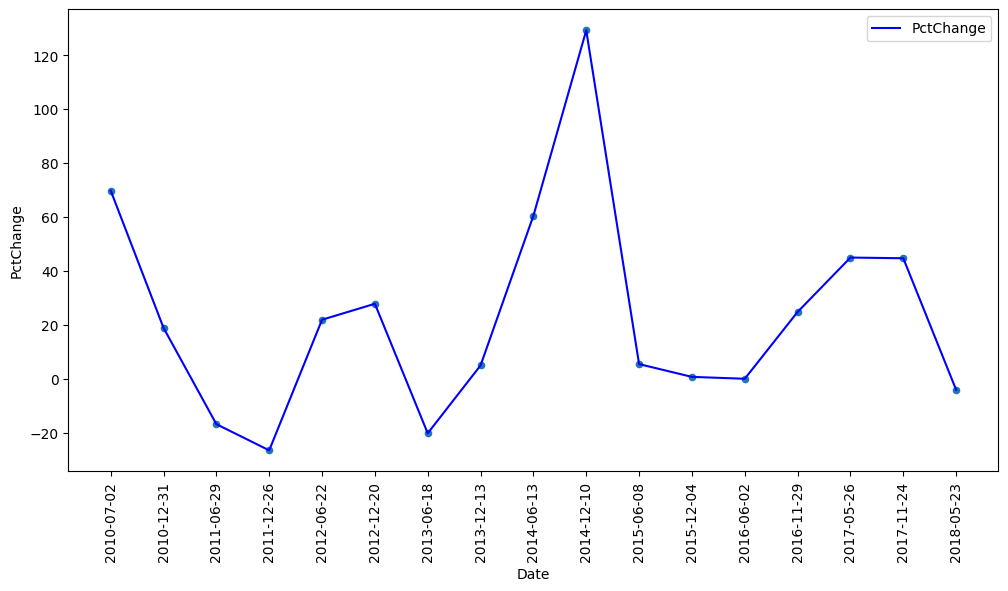

In [104]:
# plt.plot(data=portfolio)
ax = portfolio.plot(x="Date", y="PctChange", kind="scatter", figsize=[12,6], style='b', rot=90)
portfolio.plot(x="Date", y="PctChange", kind="line", ax=ax, style='b', rot=90)